In [1]:
import pandas as pd
import numpy as np

In [4]:
metadata_df = pd.read_csv('song_data.csv')
metadata_df.head()

,Unnamed: 0,artist_mbid,artist_name,artist_playmeid,danceability,duration,energy,key,loudness,mode,release,release_7digitalid,song_hotttnesss,song_id,tempo,time_signature,title,track_7digitalid,track_id,year
0,0,c43bb0d6-94d7-410f-80fb-e5a243b18d23,Raphaël,2676,0.0,148.74077,0.0,0,-9.636,1,Je Sais Que La Terre Est Plate (Deluxe),275907,0.547953,SOGSMXL12A81C23D88,124.059,4,Je Sais Que La Terre Est Plate,3073568,TRARRZU128F4253CA2,2008
1,1,a69cd724-2f57-4ed0-bfed-ba20401eb84c,Julie Zenatti,5772,0.0,252.99546,0.0,1,-11.061,0,Comme Vous,382807,0.475638,SOMBCOW12AAF3B229F,80.084,4,On Efface,4249244,TRARRJL128F92DED0E,2004
2,2,60bd8a1c-c093-4849-8f28-08101ca059b1,The Baltimore Consort,20540,0.0,78.02730,0.0,3,-24.140,1,Watkins Ale - Music of the English Renaissance,490659,NaN,SOEYIHF12AB017B5F4,54.874,4,Howells Delight,5436063,TRARRUZ128F9307C57,0
3,3,44b5b950-2ae2-403a-8c67-82d8fc72033d,I Hate Sally,-1,0.0,163.63057,0.0,7,-5.795,1,Don't Worry Lady,116616,NaN,SODJYEC12A8C13D757,77.150,3,Martha Served,1199928,TRARRWA128F42A0195,2007
4,4,0e6524bd-6641-46a6-bce5-96f06c19aa46,Orlando Pops Orchestra,-1,0.0,199.99302,0.0,10,-16.477,1,Easy Listening: Cartoon Songs,767122,NaN,SOGSOUE12A58A76443,120.382,4,Zip-A-Dee-Doo-Dah (Song of the South),8493899,TRARRPG12903CD1DE9,0


In [7]:
triplet_df = pd.read_csv('data/track_with_genre-003.csv')
triplet_df.head()

,Unnamed: 0,UserID,SongID,NumPlays,TrackID,Genre
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,TRYQMNI128F147C1C7,Pop_Rock
1,1,0f7d7d02867e87f47701c70ceb6b994c11b4db85,SOBFNSP12AF72A0E22,1,TRYQMNI128F147C1C7,Pop_Rock
2,2,f926327f2c99580a4aa414d1cfc0439f45a929bf,SOBFNSP12AF72A0E22,5,TRYQMNI128F147C1C7,Pop_Rock
3,3,85812d920b63e8a278f79f4c68cb89f4960efa75,SOBFNSP12AF72A0E22,1,TRYQMNI128F147C1C7,Pop_Rock
4,4,591e295328be6bfb1f8ba124aaca0b7a85347d66,SOBFNSP12AF72A0E22,10,TRYQMNI128F147C1C7,Pop_Rock


In [10]:
triplet_df[triplet_df['track_id'].isin(metadata_df['track_id'])].size

149653284

In [13]:
df = triplet_df[triplet_df['TrackID'].isin(metadata_df['track_id'])]
df.to_csv('triplet_subset.csv')

In [15]:
df.shape

(320584, 6)

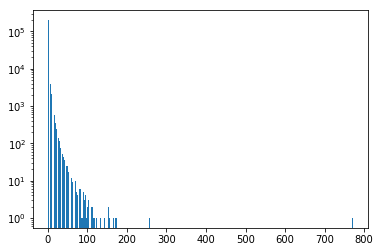

In [24]:
# df.hist(column='NumPlays', bins=1000)

import matplotlib.pyplot as plt
plt.hist(df['NumPlays'], bins=1000, log=True)
pass

In [28]:
track_genres = pd.read_table('http://www.ifs.tuwien.ac.at/mir/msd/partitions/msd-MAGD-genreAssignment.cls',names=['track_id','genre'],sep='\t')

In [29]:
track_genres.head()

,track_id,genre
0,TRAAAAK128F9318786,Pop_Rock
1,TRAAAAV128F421A322,Pop_Rock
2,TRAAAAW128F429D538,Rap
3,TRAAABD128F429CF47,Pop_Rock
4,TRAAACV128F423E09E,Pop_Rock


In [30]:
metadata_with_genre = pd.merge(metadata_df,track_genres,on='track_id', how='inner')

In [31]:
metadata_with_genre.head()

,Unnamed: 0,artist_mbid,artist_name,artist_playmeid,danceability,duration,energy,key,loudness,mode,...,release_7digitalid,song_hotttnesss,song_id,tempo,time_signature,title,track_7digitalid,track_id,year,genre
0,4,0e6524bd-6641-46a6-bce5-96f06c19aa46,Orlando Pops Orchestra,-1,0.0,199.99302,0.0,10,-16.477,1,...,767122,NaN,SOGSOUE12A58A76443,120.382,4,Zip-A-Dee-Doo-Dah (Song of the South),8493899,TRARRPG12903CD1DE9,0,Stage
1,8,37c78aeb-d196-42b5-b991-6afb4fc9bc2e,Dead Kennedys,6004,0.0,216.84200,0.0,10,-4.264,1,...,181162,0.788388,SOZQSGL12AF72A9145,92.897,4,Halloween,1959132,TRARREF128F422FD96,1982,Pop_Rock
2,10,17e137fb-59e5-4fd7-af48-afc34995396c,Atreyu,-1,0.0,218.90567,0.0,0,-4.707,0,...,290671,0.681092,SOBTEHX12A6D4FBF18,157.715,4,You Eclipsed By Me (Album Version),3260887,TRARRQO128F427B5F5,2004,Pop_Rock
3,11,e8143d56-f2e9-4122-9666-6aa5352dadcd,Mistress,160877,0.0,580.70159,0.0,0,-4.523,1,...,682479,0.401487,SOXGDVW12AB01864E7,146.331,4,Shovel,7574139,TRARRMK12903CDF793,2005,Pop_Rock
4,12,2e3b75d8-00a8-486a-b4e7-a1f8f65e64c9,Shadows Fall,12510,0.0,283.48036,0.0,0,-4.076,0,...,734726,0.687874,SOKMPKV12A67AE241B,84.992,4,What Drives The Weak,8138989,TRARUOP12903CF2384,2004,Pop_Rock


In [ ]:
metadata_with_genre.to_csv